# Loan repayment prediction

We will use lending data from 2007-2010 and try to classify and predict whether or not the borrower paid back their loan in full. 

Here are what the columns represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint as sp_randint
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 

In [2]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

ModuleNotFoundError: No module named 'google'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
loans = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Project 2/Machine-Learning-Projects-master big one here/Machine-Learning-Projects-master/Random Forest/loan_data.csv')


In [3]:
loans = pd.read_csv('loan_data.csv')

In [4]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [5]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [6]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


# Exploratory data analysis

Text(0.5, 1.0, 'Different purpose of loans given')

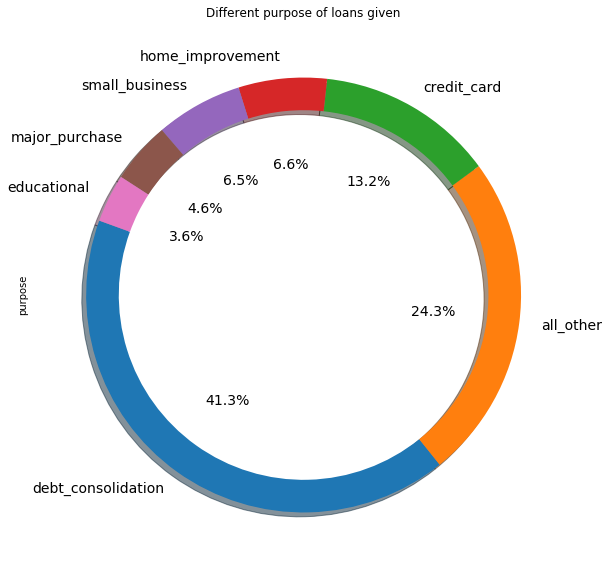

In [7]:
# The percentage wise loans given to different sector

plt.figure(figsize = (12, 8))
loans['purpose'].value_counts().plot(kind='pie', fontsize=14, autopct='%3.1f%%', wedgeprops=dict(width=0.15), 
                                       shadow=True, startangle=160, figsize=(10,10),  legend=False)
plt.title('Different purpose of loans given')

Text(0, 0.5, 'Interest Percentage %')

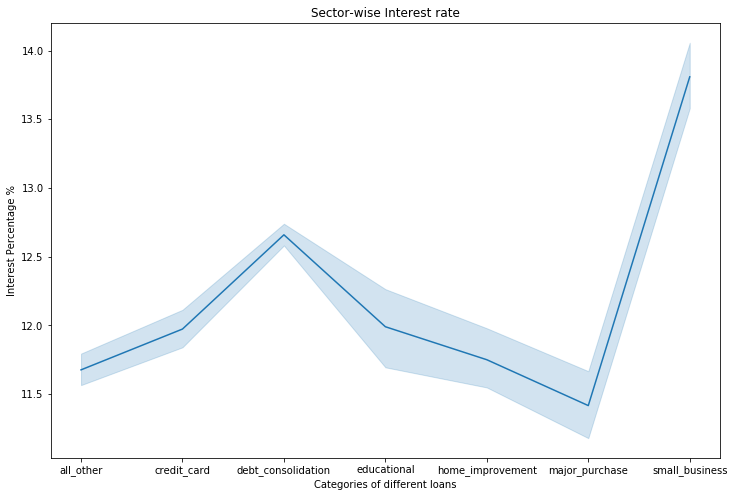

In [8]:
# Interest rate of different sector

plt.figure(figsize = (12, 8))
sns.lineplot(x = 'purpose', y = (100*loans['int.rate']), data = loans)
plt.title('Sector-wise Interest rate')
plt.xlabel('Categories of different loans')
plt.ylabel('Interest Percentage %')

- Checking the FICO credit score of the borrower.

Text(0.5, 0, 'FICO Credit Score of user')

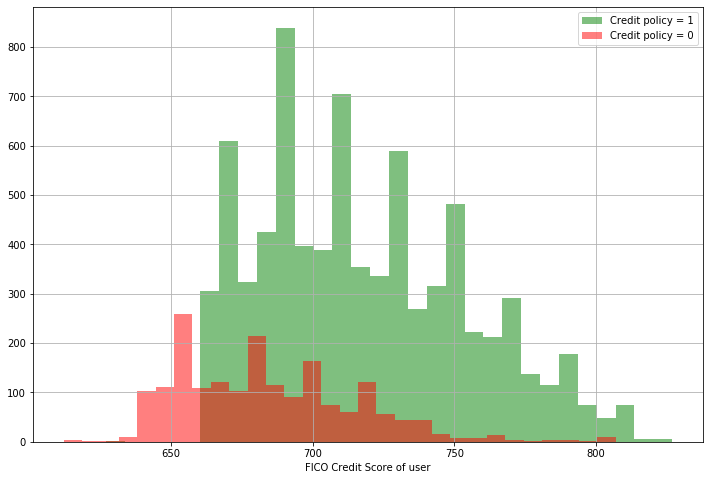

In [9]:
# FICO score analysis vs loans credited

plt.figure(figsize = (12,8))
loans[loans['credit.policy'] == 1]['fico'].hist(alpha = 0.5, color = 'Green', bins = 30, label = 'Credit policy = 1')
loans[loans['credit.policy'] == 0]['fico'].hist(alpha = .5, color = 'red',bins = 30, label = 'Credit policy = 0' )
plt.legend()
plt.xlabel("FICO Credit Score of user")

Text(0.5, 0, 'Not Fully Paid')

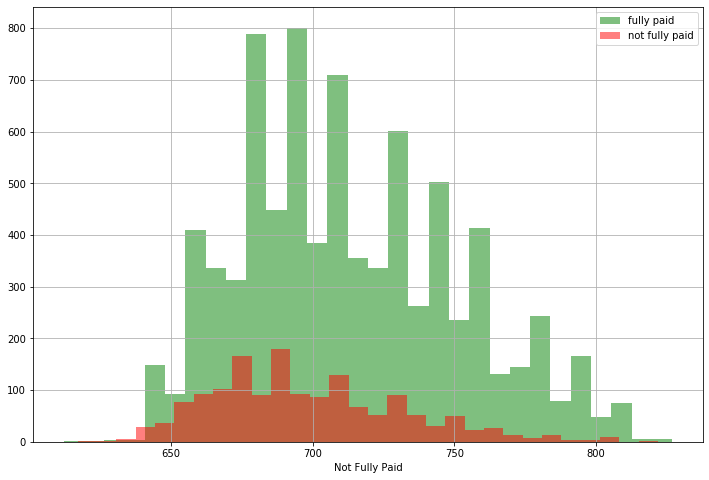

In [10]:
# Loans repaid vs FICO score

plt.figure(figsize = (12,8))
loans[loans['not.fully.paid'] == 0]['fico'].hist(alpha = .5, color = 'Green',bins = 30, label = 'fully paid ' )
loans[loans['not.fully.paid'] == 1]['fico'].hist(alpha = .5, color = 'red',bins = 30, label = 'not fully paid' )
plt.legend()
plt.xlabel('Not Fully Paid')

 - ### The trend  between FICO score  and interest rate

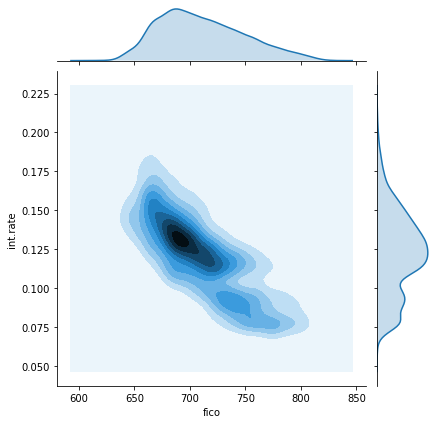

In [11]:
# Trend analysis of interst rate of loans sanctioned

sns.jointplot(x= 'fico', y= 'int.rate', data = loans, kind = 'kde')

- using density plot trend can be understod

- Interest rate is too less when the FICO score is high 
- When FICO score is less interest offered to users is very high

C:\Users\bbaby_adm\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:423: UserWarning: The following kwargs were not used by contour: 'hue'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)


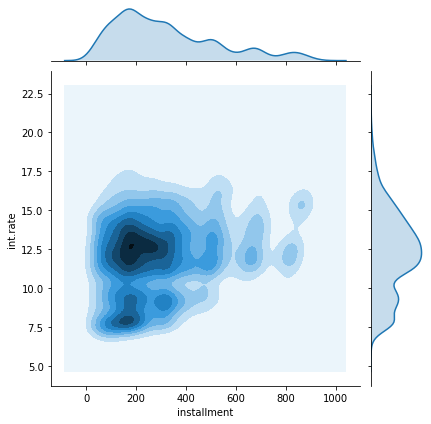

In [12]:
# Trend analysis of installment vs interest rate

sns.jointplot(x= loans['installment'], y= round(100*loans['int.rate'],2),hue = 'purpose', data = loans, kind = 'kde')

In [13]:
loans['credit.policy'].unique()

array([1, 0], dtype=int64)

- ## trend of credit policy vs not fully paid 

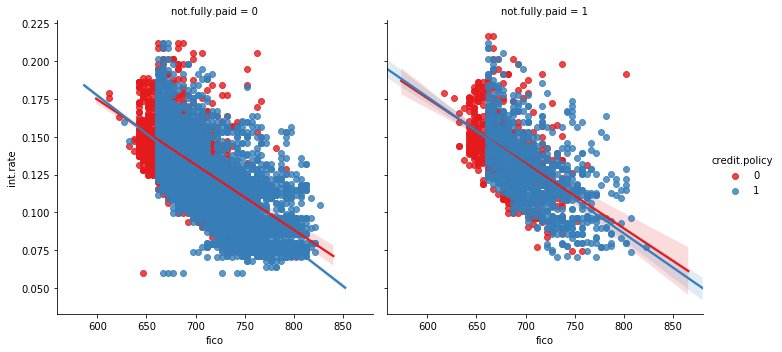

In [14]:
# Trend credit policy vs fully paid

sns.lmplot(x = 'fico', y= 'int.rate', data = loans, hue = 'credit.policy', col = 'not.fully.paid', palette = 'Set1',)

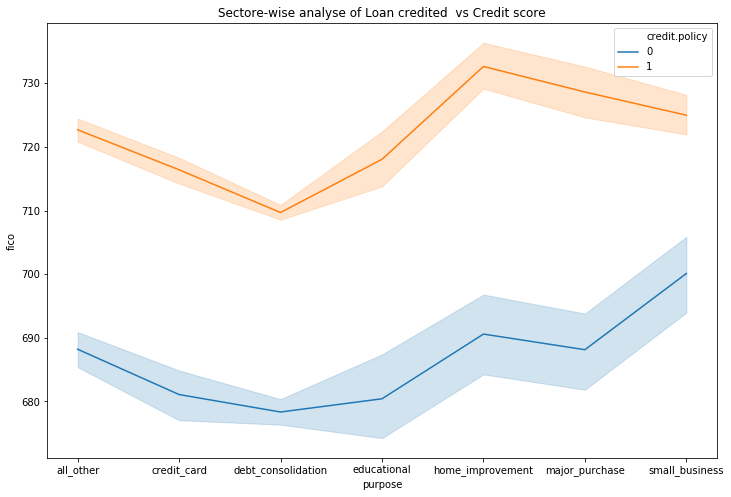

In [15]:
# Loan credited vs purpose

plt.figure(figsize = (12, 8))
sns.lineplot(x = 'purpose', y = loans['fico'], data = loans, hue = 'credit.policy')
plt.title('Sectore-wise analyse of Loan credited  vs Credit score')
plt.legend()

Text(0.5, 1.0, ' Days of Credit vs sector')

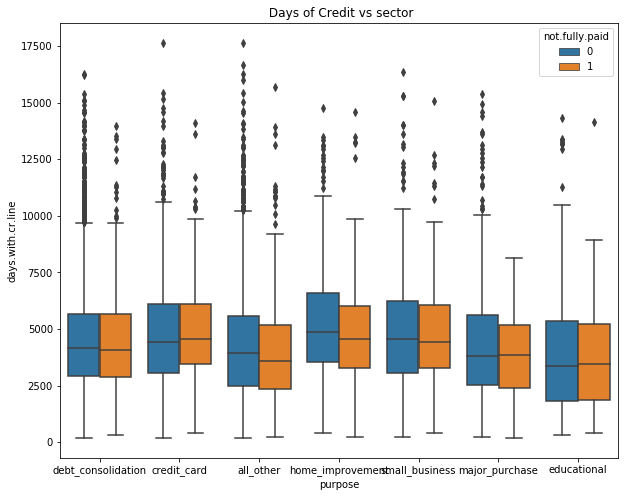

In [16]:
# Highest credit line vs loan fully paid

plt.figure(figsize = (10,8))
sns.boxplot(x = 'purpose', y = loans['days.with.cr.line'],hue = 'not.fully.paid', data = loans)
plt.title(' Days of Credit vs sector')

Text(0.5, 1.0, 'Credit line vs repayment')

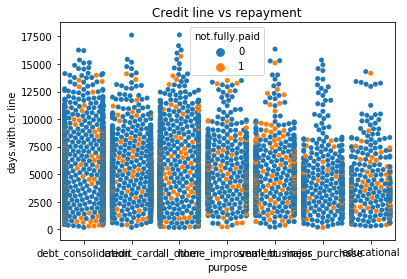

In [17]:
# Highest credit line vs loan fully paid

plt.figure(figsize = (6, 4))
sns.swarmplot(x = 'purpose', y = loans['days.with.cr.line'],hue = 'not.fully.paid', data = loans)
plt.title('Credit line vs repayment')

In [18]:
loans.head(2)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0


<Figure size 864x576 with 0 Axes>

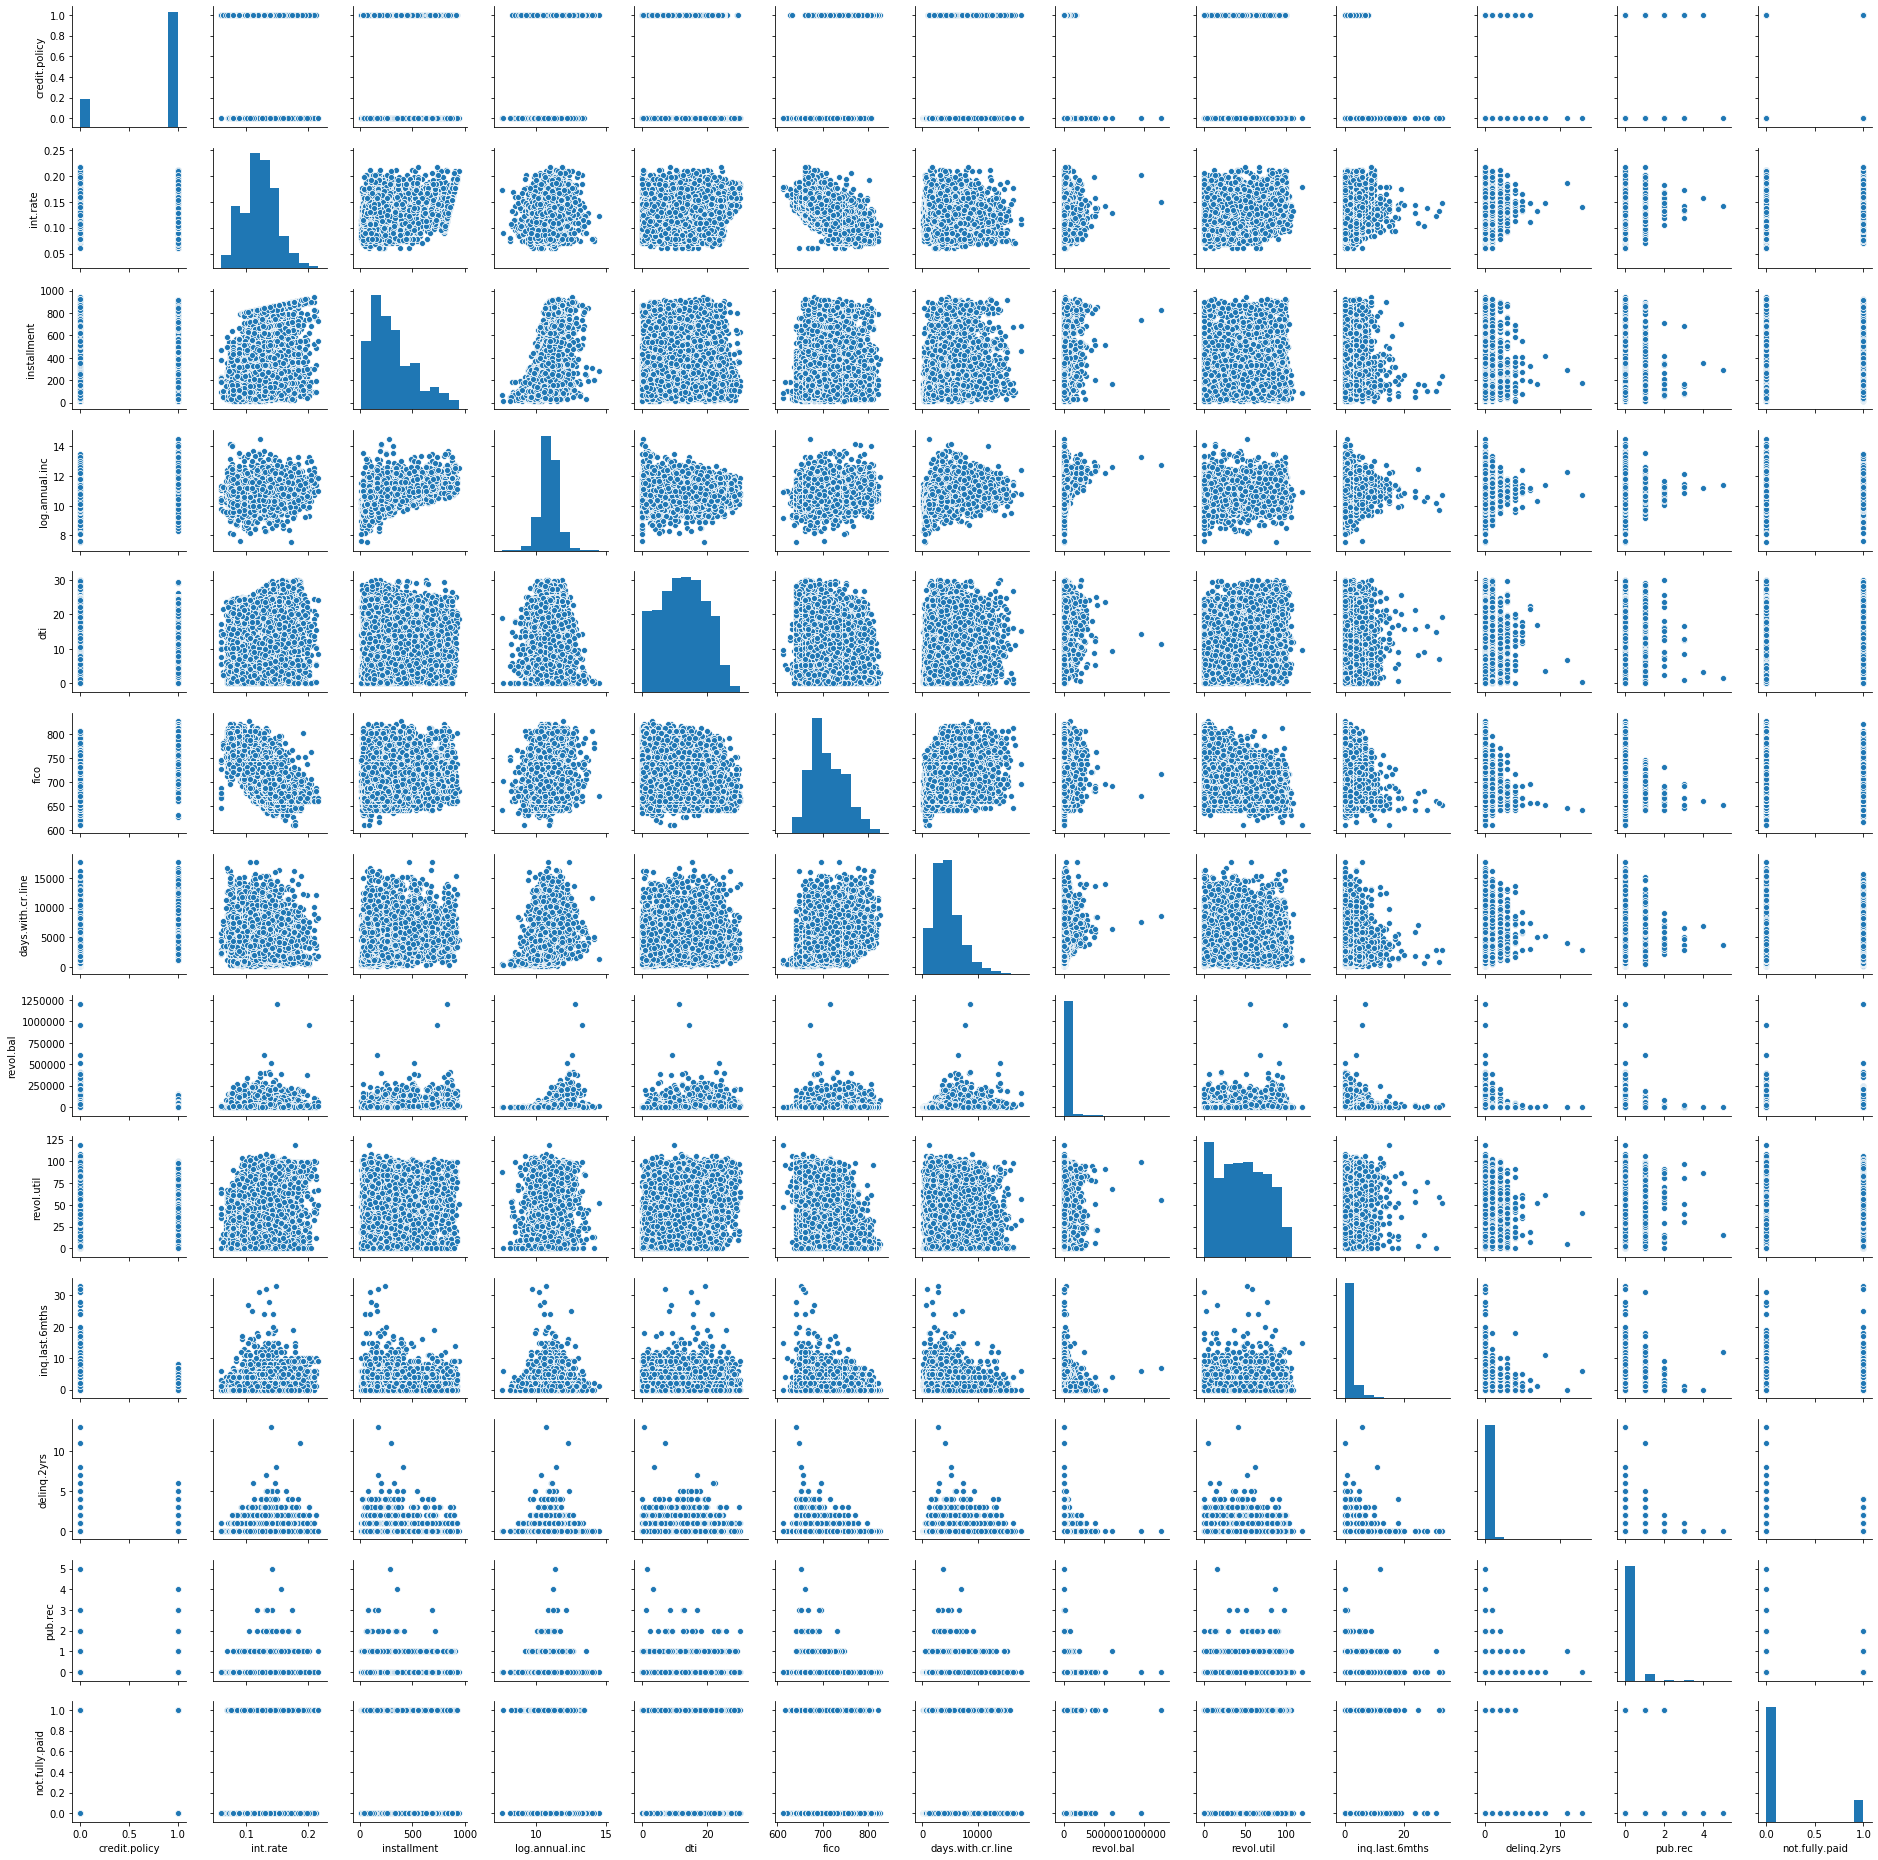

In [19]:
# complete analysis of all the features for selecting right features

plt.figure(figsize = (12, 8))
sns.pairplot(loans, height = 2)

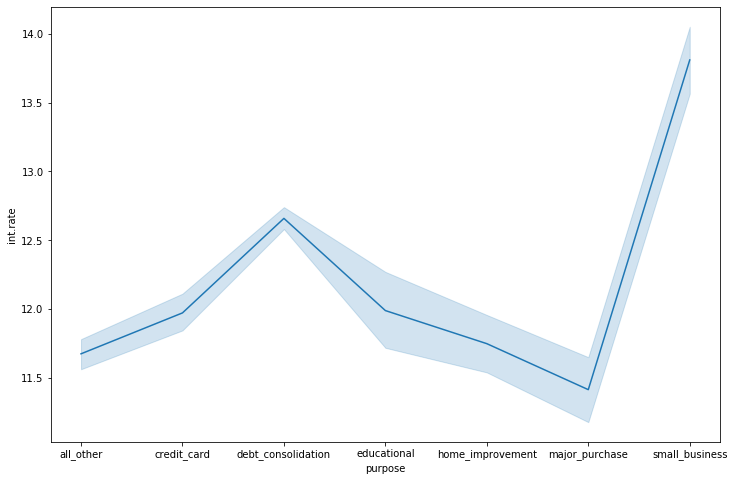

In [20]:
# Interest rate of each sector
plt.figure(figsize = (12, 8))
sns.lineplot(x = 'purpose', y = (100*loans['int.rate']), data = loans)

In [21]:
loans.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

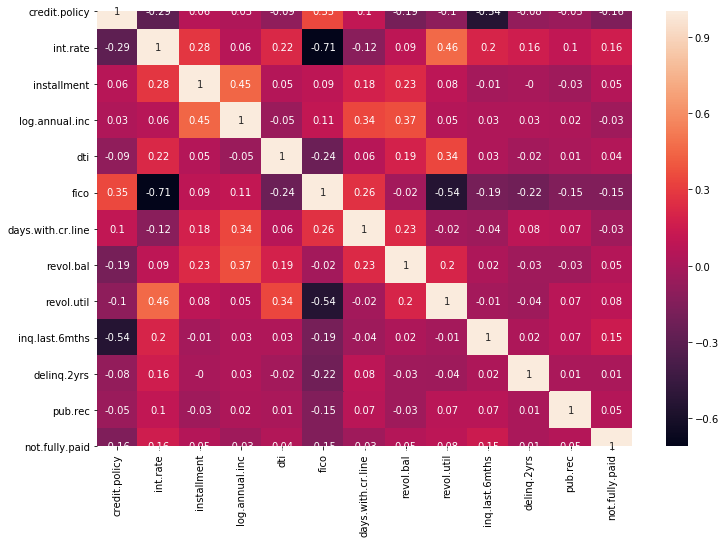

In [22]:
# Heat map
plt.figure(figsize = (12, 8))
sns.heatmap(round(loans.corr(),2),annot = True)

In [23]:
# Selecting features
loans['purpose'].unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

In [24]:
category_feature = ['purpose']

In [25]:
# Creating Dummies for model building

final_data = pd.get_dummies(loans, columns = category_feature, drop_first = True)          # Deoping first

In [26]:
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [27]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
credit.policy                 9578 non-null int64
int.rate                      9578 non-null float64
installment                   9578 non-null float64
log.annual.inc                9578 non-null float64
dti                           9578 non-null float64
fico                          9578 non-null int64
days.with.cr.line             9578 non-null float64
revol.bal                     9578 non-null int64
revol.util                    9578 non-null float64
inq.last.6mths                9578 non-null int64
delinq.2yrs                   9578 non-null int64
pub.rec                       9578 non-null int64
not.fully.paid                9578 non-null int64
purpose_credit_card           9578 non-null uint8
purpose_debt_consolidation    9578 non-null uint8
purpose_educational           9578 non-null uint8
purpose_home_improvement      9578 non-null uint8
purpose_major_purchase        9

# Train Test split

In [28]:
X = final_data.drop('not.fully.paid', axis = 1)
y = final_data['not.fully.paid']

## Training Data on Base model

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, test_size = 0.25)

  - ## logistic Regression

In [30]:
# using Logistc Regression model to find the relation between features

logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

C:\Users\bbaby_adm\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
# prediction on Logistic Regression 
predict_logistic_regression = logistic_regression.predict(X_test)

# Model evaluation and finding accuracy
from sklearn.metrics import accuracy_score, confusion_matrix
print("co_effiiect of regerssion ", logistic_regression.coef_)
print('Intercept', logistic_regression.intercept_)
print('Predict probability ',logistic_regression.predict_proba )
print('Probability ', logistic_regression.predict)

print('\nAccuracy',round(accuracy_score(y_test, predict_logistic_regression)*100,2),'%')

# confusion matix
confusion_matrix_logistic_regression = pd.DataFrame(confusion_matrix(y_test, predict_logistic_regression))
confusion_matrix_logistic_regression.index = ['Actually fully paid', 'actually not paid' ]
confusion_matrix_logistic_regression.columns = ['Predicted fully paid', 'Predicted not paid']
print('Confusion matrix: \n', confusion_matrix_logistic_regression)

co_effiiect of regerssion  [[-8.85439618e-02  7.03131140e-03  7.47277905e-04 -1.25788212e-02
  -1.76665115e-03 -2.96766008e-03 -2.53279575e-05  1.64800583e-06
   6.26022554e-03  1.05006812e-01  1.81201731e-02  2.29982659e-02
  -5.43455912e-02 -7.44428733e-02  2.45603100e-02  1.13337178e-02
  -4.35553863e-03  6.94598776e-02]]
Intercept [0.01077059]
Predict probability  <bound method LogisticRegression.predict_proba of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)>
Probability  <bound method LinearClassifierMixin.predict of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=N

  - ## Training Decision Tree Base model
      

In [32]:
# Decision  Tree model 
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [33]:
# Evaluating model

# Prediction on Decision Tree base model 
predict_dtree = dtree.predict(X_test)

# Model Evaluation & Finding accuracy
print("accuracy score  on base model", round(accuracy_score(y_test, predict_dtree)*100,2),'%')

# Classification model
print('classification report on base model : \n',classification_report(y_test, predict_dtree))

# Confusion Matrix
confusion_matrix_dtree = pd.DataFrame(confusion_matrix(y_test, predict_dtree))
print('Confusion Matrix\n')
confusion_matrix_dtree.index = ['Actually paid','Not paid']
confusion_matrix_dtree.columns =  ['Predicted Paid','Predicted not paid']
print(confusion_matrix_dtree)

accuracy score  on base model 73.4 %
classification report on base model : 
               precision    recall  f1-score   support

           0       0.84      0.84      0.84      1992
           1       0.21      0.20      0.20       403

    accuracy                           0.73      2395
   macro avg       0.52      0.52      0.52      2395
weighted avg       0.73      0.73      0.73      2395

Confusion Matrix

               Predicted Paid  Predicted not paid
Actually paid            1676                 316
Not paid                  321                  82


-  That means 
- 1670+89 Correct predictions
- 314 + 322 False Predictions

In [34]:
'''from graphviz import Source
graph = Source(dtree.export_graphviz(dtree, out_file=None,filled=True, rounded=True,  
                                special_characters=True, feature_names=X.columns))
graph.format = 'png'
graph.render('dtree_render',view=True)'''

"from graphviz import Source\ngraph = Source(dtree.export_graphviz(dtree, out_file=None,filled=True, rounded=True,  \n                                special_characters=True, feature_names=X.columns))\ngraph.format = 'png'\ngraph.render('dtree_render',view=True)"

  - ## Base RandomForestClassifier

In [35]:
# RandomForestClassifier Model 
rfc = RandomForestClassifier(n_estimators= 100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [36]:
# prediction on RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
predict_rfc = rfc.predict(X_test)

# Classification Reports 
print("Classification Report\n",classification_report( y_test, predict_rfc), '\n')

# Accuracy score 
print("Accuracy score : ", round(accuracy_score(y_test, predict_rfc)*100, 2,),'%')

# Confusion matrix
print('\nConfusion Matrix\n')
confusion_matrix_rfc = pd.DataFrame(confusion_matrix(y_test, predict_rfc))
confusion_matrix_rfc.index = ['Actual paid','Actual not paid']
confusion_matrix_rfc.columns = ['Predicted paid','Predicted not paid']
print(confusion_matrix_rfc)

Classification Report
               precision    recall  f1-score   support

           0       0.83      1.00      0.91      1992
           1       0.56      0.02      0.04       403

    accuracy                           0.83      2395
   macro avg       0.70      0.51      0.48      2395
weighted avg       0.79      0.83      0.76      2395
 

Accuracy score :  83.26 %

Confusion Matrix

                 Predicted paid  Predicted not paid
Actual paid                1985                   7
Actual not paid             394                   9


#  Finding best parameter using GridSearchCV and RandomizedSearchCV

  - ## Finding best model using GridSearchCV

In [37]:
# GridSearch cross validation technique 
tree_para = [{'criterion':['entropy', 'gini'],
              'max_depth': range(2,60),
              'max_features': ['sqrt', 'log2', None] }]

In [38]:
# Applying Dtree model on GridSearchCV and finding best parameters
grid_searchcv_dtree = GridSearchCV(dtree,tree_para, cv=15, refit='AUC')
grid_searchcv_dtree.fit(X_train, y_train)

GridSearchCV(cv=15, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid=[{'criterion': ['entropy', 'gini'],
                          'max_depth': range(2, 60),
                      

In [39]:
# Prediction on Model  using GridSearchCV
predict_gridsearchcv = grid_searchcv_dtree.predict(X_test)

# Finding the best estimator
print('Decision Tree Best Estimator\n ',grid_searchcv_dtree.best_estimator_)

#  parameters of this estimator
print('Best Parameters of this estimator', grid_searchcv_dtree.get_params)

Decision Tree Best Estimator
  DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
                       max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
Best Parameters of this estimator <bound method BaseEstimator.get_params of GridSearchCV(cv=15, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
            

In [40]:
# Accuracy of the GridSearchCV on dtree model
print('Accuracy Score : ', round(accuracy_score(y_test, predict_gridsearchcv)*100, 2),'%')

# Parameters of this estimator
print('Parameters of this estimator', grid_searchcv_dtree.get_params)

# Confusion Matrix using GridSearchCV
print('\nConfusion Matrix ')
confusion_matrix_gridsearchcv = pd.DataFrame(confusion_matrix(y_test, predict_gridsearchcv))
confusion_matrix_gridsearchcv.index = ['Actual paid','Actual not paid']
confusion_matrix_gridsearchcv.columns = ['Predicted paid','Predicted not paid']
print(confusion_matrix_gridsearchcv)

# Classification Report
print('\nClassification Report \n', classification_report(y_test, predict_gridsearchcv))

Accuracy Score :  83.17 %
Parameters of this estimator <bound method BaseEstimator.get_params of GridSearchCV(cv=15, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid=[{'criterion':

C:\Users\bbaby_adm\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [ ]:
# Applying rfc model on  GridSearchCV and finding best parameters
grid_searchcv_rfc = GridSearchCV(rfc,tree_para, cv=15, refit='AUC')
grid_searchcv_rfc.fit(X_train, y_train)

# Prediction on Model  using GridSearchCV
predict_gridsearchcv_rfc = grid_searchcv_rfc.predict(X_test)

# Finding the best estimator
print('RandomForest Calssifier Best Estimator\n',grid_searchcv_rfc.best_estimator_)

In [47]:
# Accuracy of the GridSearchCV on rfc model
print('Accuracy Score : ', round(accuracy_score(y_test, predict_gridsearchcv)*100, 2),'%')

# Parameters of this estimator
print('Parameters of this estimator', grid_searchcv_rfc.get_params)

# Confusion Matrix using GridSearchCV
print('\nConfusion Matrix ')
confusion_matrix_gridsearchcv = pd.DataFrame(confusion_matrix(y_test, predict_gridsearchcv))
confusion_matrix_gridsearchcv.index = ['Actual paid','Actual not paid']
confusion_matrix_gridsearchcv.columns = ['Predicted paid','Predicted not paid']
print(confusion_matrix_gridsearchcv)

# Classification Report
print('\nClassification Report \n', classification_report(y_test, predict_gridsearchcv))


Accuracy Score :  83.17 %
Parameters of this estimator <bound method BaseEstimator.get_params of GridSearchCV(cv=15, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              random_state=Non

C:\Users\bbaby_adm\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


 - This is not giving any promising result in COnfusion matrix although accuracy is 83%

 - # Finding best model using RandomizedSearchCV

In [42]:
# Defining  Parameters and distributions to form model
# these are random parameters 

param_dist = {
    'max_depth'         : range(2,20),
    'min_samples_split' : sp_randint(5,25),
    'min_samples_leaf'  : sp_randint(5,20),
    'bootstrap'         : [True, False],
    'criterion'         : ['gini', 'entropy'],
    'n_estimators'      : [20,50,100,400,1000,1500],
    'max_features'      : ['sqrt', 'log2', None],
              }
# applying decision tree model on RandomizedsearchCV 

# run randomized search
n_iter_search  = 100

randomized_searchcv = RandomizedSearchCV(dtree, 
                                   param_distributions= param_dist,
                                   n_iter = n_iter_search,
                                   n_jobs  = -1 )

randomized_searchcv.fit(X_train, y_train)

predict_randomized_searchcv = randomized_searchcv.predict(X_test)

print('Best estimator', randomized_searchcv.best_estimator_)
print('best parameters',randomized_searchcv.get_params )

print('\nAccuracy Score\n', accuracy_score(y_test, predict_randomized_searchcv))
print('\nConfusion Matrix', confusion_matrix(y_test, predict_randomized_searchcv))


print('\nConfusion Matrix\n')
confusion_matrix_randomized_searchcv = pd.DataFrame(confusion_matrix(y_test, predict_randomized_searchcv))
confusion_matrix_randomized_searchcv.index = ['Actual paid','Actual not paid']
confusion_matrix_randomized_searchcv.columns = ['Predicted paid','Predicted not paid']
print(confusion_matrix_randomized_searchcv)

C:\Users\bbaby_adm\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


ValueError: Invalid parameter bootstrap for estimator DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best'). Check the list of available parameters with `estimator.get_params().keys()`.

In [46]:
# applying rfc model  on RandomizedsearchCV 
randomized_searchcv = RandomizedSearchCV(rfc, param_distributions= param_dist,
                                   n_iter = n_iter_search,
                                   n_jobs  = -1 )

randomized_searchcv.fit(X_train, y_train)

predict_randomized_searchcv = randomized_searchcv.predict(X_test)

print('Best estimator', randomized_searchcv.best_estimator_)
print('best parameters',randomized_searchcv.get_params )

print('\nAccuracy Score\n', accuracy_score(y_test, predict_randomized_searchcv))
print('\nConfusion Matrix', confusion_matrix(y_test, predict_randomized_searchcv))


print('\nConfusion Matrix\n')
confusion_matrix_randomized_searchcv = pd.DataFrame(confusion_matrix(y_test, predict_randomized_searchcv))
confusion_matrix_randomized_searchcv.index = ['Actual paid','Actual not paid']
confusion_matrix_randomized_searchcv.columns = ['Predicted paid','Predicted not paid']
print(confusion_matrix_randomized_searchcv)

C:\Users\bbaby_adm\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best estimator RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=12, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=14,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
best parameters <bound method BaseEstimator.get_params of RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                       

In [43]:
# applying dtree model  on RandomizedsearchCV 
randomized_searchcv = RandomizedSearchCV(dtree, param_distributions= param_dist,
                                   n_iter = n_iter_search,
                                   n_jobs  = -1 )

randomized_searchcv.fit(X_train, y_train)

predict_randomized_searchcv = randomized_searchcv.predict(X_test)

print('Best estimator', randomized_searchcv.best_estimator_)
print('best parameters',randomized_searchcv.get_params )

print('\nAccuracy Score\n', accuracy_score(y_test, predict_randomized_searchcv))
print('\nConfusion Matrix', confusion_matrix(y_test, predict_randomized_searchcv))


print('\nConfusion Matrix\n')
confusion_matrix_randomized_searchcv = pd.DataFrame(confusion_matrix(y_test, predict_randomized_searchcv))
confusion_matrix_randomized_searchcv.index = ['Actual paid','Actual not paid']
confusion_matrix_randomized_searchcv.columns = ['Predicted paid','Predicted not paid']
print(confusion_matrix_randomized_searchcv)

C:\Users\bbaby_adm\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


ValueError: Invalid parameter bootstrap for estimator DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best'). Check the list of available parameters with `estimator.get_params().keys()`.

# Applying parameters from Cross Validation Techniques  to the models 

In [45]:
# Applying RandomForestClassifier parameters
checker_model  = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=21, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
checker_model.fit(X_train, y_train)
predict_checker = checker_model.predict(X_test)
# Accuracy of the GridSearchCV on rfc model
print('Accuracy Score : ', round(accuracy_score(y_test, predict_checker)*100, 2),'%')

# Confusion Matrix using GridSearchCV
print('\nConfusion Matrix ')
confusion_matrix_gridsearchcv = pd.DataFrame(confusion_matrix(y_test, predict_checker))
confusion_matrix_gridsearchcv.index = ['Actual paid','Actual not paid']
confusion_matrix_gridsearchcv.columns = ['Predicted paid','Predicted not paid']
print(confusion_matrix_gridsearchcv)

# Classification Report
print('\nClassification Report \n', classification_report(y_test, predict_gridsearchcv))


Accuracy Score :  82.92 %

Confusion Matrix 
                 Predicted paid  Predicted not paid
Actual paid                1978                  14
Actual not paid             395                   8

Classification Report 
               precision    recall  f1-score   support

           0       0.83      1.00      0.91      1992
           1       0.00      0.00      0.00       403

    accuracy                           0.83      2395
   macro avg       0.42      0.50      0.45      2395
weighted avg       0.69      0.83      0.76      2395



C:\Users\bbaby_adm\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [44]:
# Applying DecisonTreeClassifier parameters

checker_DecisionTreeClassifier =  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                                   max_features=None, max_leaf_nodes=None,
                                   min_impurity_decrease=0.0, min_impurity_split=None,
                                   min_samples_leaf=1, min_samples_split=2,
                                   min_weight_fraction_leaf=0.0, presort=False,
                                   random_state=None, splitter='best')
checker_DecisionTreeClassifier.fit(X_train, y_train)
predict_checker_DecisionTreeClassifier = checker_DecisionTreeClassifier.predict(X_test)


# Accuracy of the GridSearchCV on rfc model
print('Accuracy Score : ', round(accuracy_score(y_test, predict_checker_DecisionTreeClassifier)*100, 2),'%')

# Confusion Matrix using GridSearchCV
print('\nConfusion Matrix ')
confusion_matrix_gridsearchcv = pd.DataFrame(confusion_matrix(y_test, predict_checker_DecisionTreeClassifier))
confusion_matrix_gridsearchcv.index = ['Actual paid','Actual not paid']
confusion_matrix_gridsearchcv.columns = ['Predicted paid','Predicted not paid']
print(confusion_matrix_gridsearchcv)

# Classification Report
print('\nClassification Report \n', classification_report(y_test, predict_gridsearchcv))

Accuracy Score :  73.53 %

Confusion Matrix 
                 Predicted paid  Predicted not paid
Actual paid                1666                 326
Actual not paid             308                  95

Classification Report 
               precision    recall  f1-score   support

           0       0.83      1.00      0.91      1992
           1       0.00      0.00      0.00       403

    accuracy                           0.83      2395
   macro avg       0.42      0.50      0.45      2395
weighted avg       0.69      0.83      0.76      2395



C:\Users\bbaby_adm\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [ ]:
# GridSearch CV testing
checker_gridsearch = GridSearchCV(cv=15, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'criterion': ['entropy', 'gini'],
                          'max_depth': range(2, 60),
                          'max_features': ['sqrt', 'log2', None]}],
             pre_dispatch='2*n_jobs', refit='AUC', return_train_score=False,
             scoring=None, verbose=0)
checker_gridsearch.fit(X_train, y_train)
predict_checker_gridsearch = checker_model.predict(X_test)

# Accuracy of the GridSearchCV on rfc model
print('Accuracy Score : ', round(accuracy_score(y_test, predict_checker_gridsearch)*100, 2),'%')

# Confusion Matrix using GridSearchCV
print('\nConfusion Matrix ')
confusion_matrix_gridsearchcv = pd.DataFrame(confusion_matrix(y_test, predict_checker_gridsearch))
confusion_matrix_gridsearchcv.index = ['Actual paid','Actual not paid']
confusion_matrix_gridsearchcv.columns = ['Predicted paid','Predicted not paid']
print(confusion_matrix_gridsearchcv)

# Classification Report
print('\nClassification Report \n', classification_report(y_test, predict_gridsearchcv))


# Conclusion 
## Accuracy
Hence we can conclude that,

 - Logistic regression      :     83% accuracy

 - Decision Tree base model : 72% accuracy 

 - RandomForestClassifier base model : 83%

 - GrisearchCV  and Randomizedsearchcv gave an accuracy of 83%

so we could conclude that LR or GS or RS can be used as the best model as they all give out similar results
